In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

**Load Data**

In [2]:
train_dir='/kaggle/input/mask-detection/maskdata/maskdata/train'
test_dir='/kaggle/input/mask-detection/maskdata/maskdata/test'

In [3]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_images = train_generator.flow_from_directory(train_dir,target_size = (224,224),color_mode='rgb',class_mode = 'binary',batch_size=32,shuffle=True,seed=42,subset='training')
val_images = train_generator.flow_from_directory(train_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=True,seed=42,subset='validation')
test_images= test_generator.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=False)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


**TRAINING**

In [5]:
inputs = tf.keras.Input(shape=(224,224,3))
x=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(inputs)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0     

**CREATEING NEW THREAD POOL**

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,validation_data=val_images,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)])

Epoch 1/100
16/16 [==============================] - 28s 2s/step - loss: 0.7000 - accuracy: 0.5538 - val_loss: 0.6938 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 25s 2s/step - loss: 0.6930 - accuracy: 0.5538 - val_loss: 0.6892 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 25s 2s/step - loss: 0.6945 - accuracy: 0.5538 - val_loss: 0.6896 - val_accuracy: 0.5528
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.6898 - accuracy: 0.5538 - val_loss: 0.6832 - val_accuracy: 0.5528
Epoch 5/100
16/16 [==============================] - 25s 2s/step - loss: 0.6825 - accuracy: 0.5538 - val_loss: 0.6782 - val_accuracy: 0.5528
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.6767 - accuracy: 0.5538 - val_loss: 0.6657 - val_accuracy: 0.5528
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 0.6696 - accuracy: 0.5558 - val_loss: 0.6733 - val_accuracy: 0.5528
Epoch 8/100
1

In [7]:
results=model.evaluate(test_images,verbose=0)
print("Loss {:.5f}".format(results[0]))
print("Accuracy{:.5f}".format(results[1]*100))

Loss 0.41458
Accuracy92.42424


**Visualize Results**

In [8]:
sample_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
sample_images=sample_generator.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='binary',batch_size=32,shuffle=True,seed=42)
                    

Found 198 images belonging to 2 classes.


1/1 [==============================] - 1s 552ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

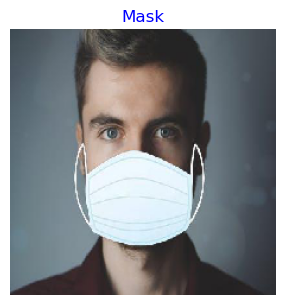

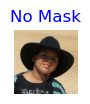

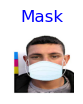

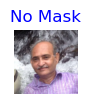

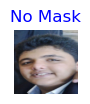

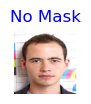

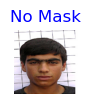

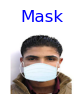

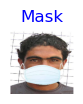

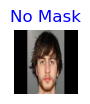

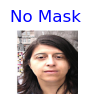

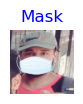

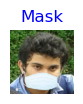

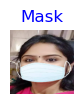

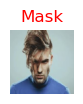

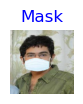

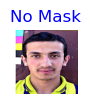

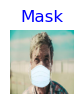

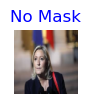

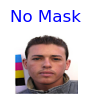

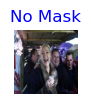

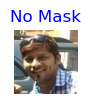

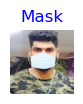

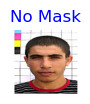

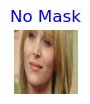

In [9]:
samples=sample_images.next()
predictions=np.squeeze(model.predict(samples[0])>=0.5).astype(np.int)
labels=samples[1].astype(np.int)
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("No Mask" if predictions[i]==1 else "Mask"),color=('blue' if labels[i]==predictions[i] else 'red'))
    plt.show()
                                